# Customer Personality Analysis

### Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Data

In [3]:
df = pd.read_csv('/Users/hibrizi/Project/Datathon/rfm-customer-segmentation/data/marketing_campaign.csv', sep='\t')

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Pre-processing Data

#### 1. Copy of Original Data

In [5]:
df_clean = df.copy()

#### 2. Remove Uninformative column: ID, Z_CostContact, and Z_Revenue columns do not provide useful information for analysis/modelling.

In [6]:
df_clean.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'], inplace=True)

#### 3. Datetime Conversion

In [7]:
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'], format="%d-%m-%Y")

#### 4. New Feature: Age & Number of Feature 

In [8]:
df_clean['Customer_Age'] = 2025 - df_clean['Year_Birth']
df_clean['Total_Children'] = df_clean['Kidhome'] + df_clean['Teenhome']

#### 5. New Feature: Total Expenditure

In [9]:
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_clean['Total_Spent'] = df_clean[product_columns].sum(axis=1)

#### 6. Handle Missing Value

In [10]:
df_clean.isnull().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
Customer_Age            0
Total_Children          0
Total_Spent             0
dtype: int64

In [11]:
df_clean['Income'].fillna(df_clean['Income'].median(), inplace=True)

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/1232948069.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Income'].fillna(df_clean['Income'].median(), inplace=True)


In [12]:
df_clean.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Customer_Age           0
Total_Children         0
Total_Spent            0
dtype: int64

#### 7. One-Hot Encoding

In [13]:
df_clean = pd.get_dummies(df_clean, columns=['Education', 'Marital_Status'], drop_first=True)

#### 8. Remove Rendundant Column

In [14]:
df_clean.drop(columns=['Year_Birth', 'Kidhome', 'Teenhome'], inplace=True)

#### 9. Reset Index

In [15]:
df_clean.reset_index(drop=True, inplace=True)

### Visualisation of Data

In [16]:
import plotly.express as px
import plotly.graph_objects as go

In [17]:
df_clean.head(10)

,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,58138.0,2012-09-04,58,635,88,546,172,88,88,3,...,True,False,False,False,False,False,True,False,False,False
1,46344.0,2014-03-08,38,11,1,6,2,1,6,2,...,True,False,False,False,False,False,True,False,False,False
2,71613.0,2013-08-21,26,426,49,127,111,21,42,1,...,True,False,False,False,False,False,False,True,False,False
3,26646.0,2014-02-10,26,11,4,20,10,3,5,2,...,True,False,False,False,False,False,False,True,False,False
4,58293.0,2014-01-19,94,173,43,118,46,27,15,5,...,False,False,True,False,False,True,False,False,False,False
5,62513.0,2013-09-09,16,520,42,98,0,42,14,2,...,False,True,False,False,False,False,False,True,False,False
6,55635.0,2012-11-13,34,235,65,164,50,49,27,4,...,True,False,False,False,True,False,False,False,False,False
7,33454.0,2013-05-08,32,76,10,56,3,1,23,2,...,False,False,True,False,False,True,False,False,False,False
8,30351.0,2013-06-06,19,14,0,24,3,3,2,1,...,False,False,True,False,False,False,False,True,False,False
9,5648.0,2014-03-13,68,28,0,6,1,1,13,1,...,False,False,True,False,False,False,False,True,False,False


#### 1. Age Histogram

In [18]:
fig1 = px.histogram(df_clean, x='Customer_Age', nbins=30, marginal="box", color_discrete_sequence=["#00BFFF"],
                    title='Distribusi Usia Pelanggan')
fig1.update_layout(bargap=0.1)
fig1.show()

#### 2. Expenditure Boxplot vs Marital Status

In [19]:
df_clean['MaritalStatus'] = df_clean[[col for col in df_clean.columns if 'Marital_Status_' in col]].idxmax(axis=1)
df_clean['MaritalStatus'] = df_clean['MaritalStatus'].str.replace('Marital_Status_', '')

fig2 = px.box(df_clean, x='MaritalStatus', y='Total_Spent', color='MaritalStatus',
              title='Total Expenditure by Marital Status')
fig2.show()

#### 3. Heatmap

In [20]:
corr = df_clean.select_dtypes(include='number').corr()
fig3 = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation")
))
fig3.update_layout(title="Numerical Correlation Heatmap", xaxis_nticks=36)
fig3.show()

#### 5. Education Barplot

In [21]:
edu_counts = df_clean[[col for col in df_clean.columns if 'Education_' in col]].sum().reset_index()
edu_counts.columns = ['Education', 'Count']
edu_counts['Education'] = edu_counts['Education'].str.replace('Education_', '')

fig4 = px.bar(edu_counts, x='Education', y='Count', color='Education',
              title='Number of Customers by Education', text='Count')
fig4.update_traces(textposition='outside')
fig4.show()

#### 6. Income Scatterplot vs Total Spending

In [22]:
fig5 = px.scatter(df_clean, x='Income', y='Total_Spent', color='Response',
                  title='Income vs Total Spending (With Response Label)',
                  labels={'Response': 'Campaign Response'})
fig5.show()

### Advance Analysis with RFM
#### ==============================================
#### You will get: 
####  a Information about loyal customers vs dorman
####  b. Campaign Strategy Adjustment
####  c. Foundation for advanced clustering
#### ==============================================

#### 1. RECENCY = How many days since last interaction

In [23]:
df_rfm = df_clean.copy()
max_date = df_rfm['Dt_Customer'].max()
df_rfm['Recency_RFM'] = (max_date - df_rfm['Dt_Customer']).dt.days

#### 2. FREQUENCY = Total Purchase Amount

In [24]:
df_rfm['Frequency_RFM'] = df_rfm[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

#### 3. MONETARY = Total Expenditure

In [25]:
df_rfm['Monetary_RFM'] = df_rfm['Total_Spent']

#### 4. RFM Column Only

In [26]:
rfm = df_rfm[['Recency_RFM', 'Frequency_RFM', 'Monetary_RFM']]

#### 5. Make a Quartile Score

In [27]:
rfm['R_Score'] = pd.qcut(rfm['Recency_RFM'], 4, labels=[4, 3, 2, 1])
rfm['F_Score'] = pd.qcut(rfm['Frequency_RFM'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M_Score'] = pd.qcut(rfm['Monetary_RFM'], 4, labels=[1, 2, 3, 4])

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/2363493608.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/2363493608.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/2363493608.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

#### 6. Combination Score & Total Score

In [28]:
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score', 'F_Score', 'M_Score']].astype(int).sum(axis=1)

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/1329339391.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/1329339391.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 7. Segmentation by Score

In [29]:
def rfm_level(score):
    if score >= 9:
        return 'Top Customers'
    elif score >= 7:
        return 'Loyal Customers'
    elif score >= 5:
        return 'Potential'
    else:
        return 'At Risk'

rfm['Segment'] = rfm['RFM_Score'].apply(rfm_level)

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/386925892.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 8. Segmen Summary

In [30]:
rfm_summary = rfm['Segment'].value_counts().reset_index()
rfm_summary.columns = ['Segment', 'Jumlah']
print(rfm_summary)

           Segment  Jumlah
0    Top Customers     827
1        Potential     606
2  Loyal Customers     590
3          At Risk     217


#### 9. Visualisation of Segment

In [31]:
# Setup theme and color palette
sns.set_theme(style="whitegrid")
custom_palette = {
    'Top Customers': '#00C49A',
    'Loyal Customers': '#0088FE',
    'Potential': '#FFBB28',
    'At Risk': '#FF4444'
}

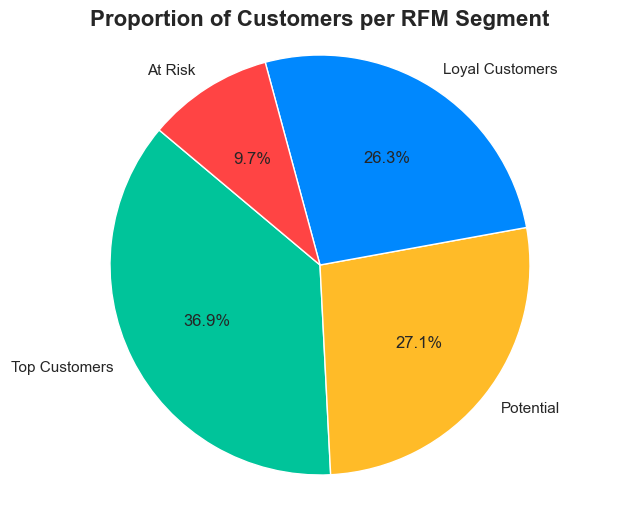

In [32]:
# 1. Pie Chart - Proporsi Setiap Segment
segment_counts = rfm['Segment'].value_counts()
colors = [custom_palette[seg] for seg in segment_counts.index]

plt.figure(figsize=(8, 6))
plt.pie(segment_counts, labels=segment_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers per RFM Segment', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

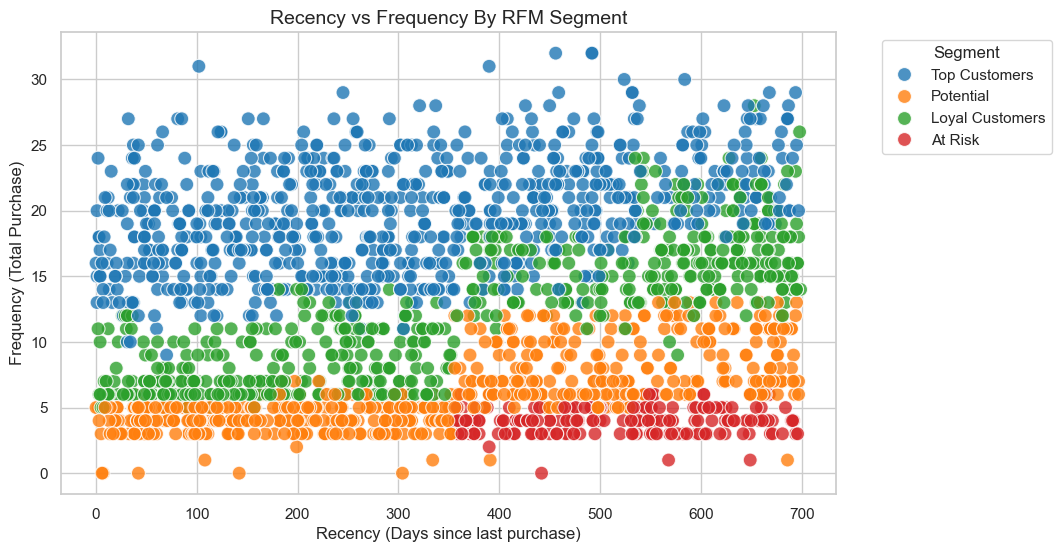

In [33]:
# 2. Scatterplot: Recency vs Frequency (Colour by Segment)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency_RFM', y='Frequency_RFM', hue='Segment', palette='tab10', s=100, alpha=0.8)
plt.title('Recency vs Frequency By RFM Segment', fontsize=14)
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Frequency (Total Purchase)')
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Clustering

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#### 1. RFM Feature Only

In [35]:
rfm_features = rfm[['Recency_RFM', 'Frequency_RFM', 'Monetary_RFM']]

#### 2. Standardisation

In [36]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

#### 3. Elbow Method to find the optimal number of clusters

In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

#### 4. Plot Elbow

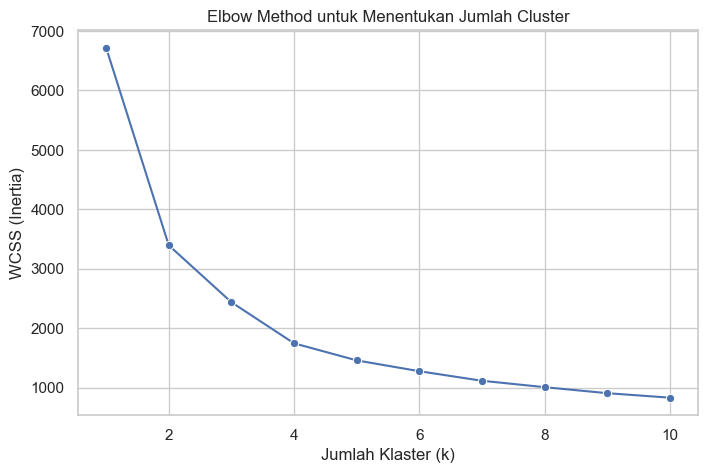

In [38]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=range(1, 11), y=wcss, marker='o')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('WCSS (Inertia)')
plt.grid(True)
plt.show()

#### 5. Fit KMeans

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

/var/folders/qk/vt03qgxx57d2nf96qtx8rwpr0000gn/T/ipykernel_70829/777266440.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### 6. Clustering Visualisation

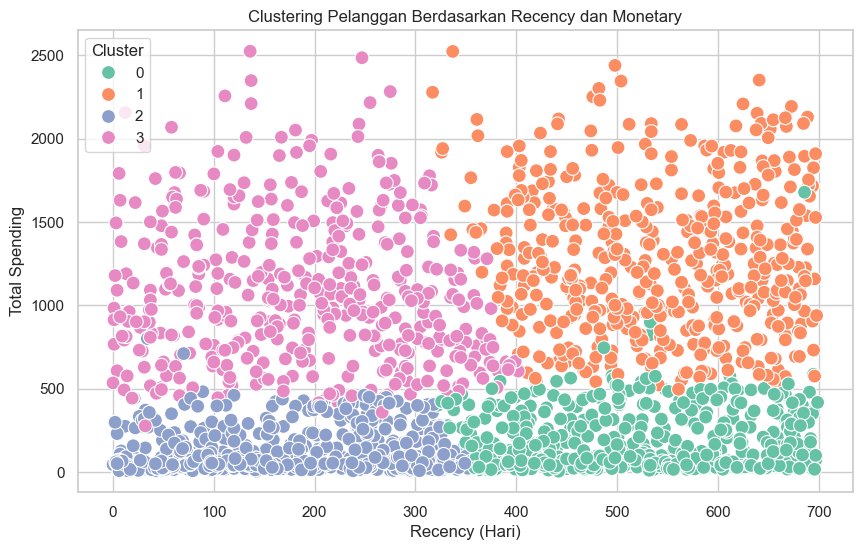

In [40]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency_RFM', y='Monetary_RFM', hue='Cluster', palette='Set2', s=100)
plt.title('Clustering Pelanggan Berdasarkan Recency dan Monetary')
plt.xlabel('Recency (Hari)')
plt.ylabel('Total Spending')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

#### 7. Average of each cluster

In [41]:
cluster_summary = rfm.groupby('Cluster')[['Recency_RFM', 'Frequency_RFM', 'Monetary_RFM']].mean().round(1)
print(cluster_summary)

         Recency_RFM  Frequency_RFM  Monetary_RFM
Cluster                                          
0              516.4            7.7         184.5
1              540.8           20.0        1268.7
2              171.5            6.4         116.4
3              191.7           18.9        1079.2


### 📊 Interpretasi Clustering Pelanggan Berdasarkan RFM (Indonesia Version)

| Cluster | Karakteristik                                                                 | Interpretasi                | Strategi Tindakan                                                                 |
|---------|--------------------------------------------------------------------------------|-----------------------------|------------------------------------------------------------------------------------|
| **0**   | Recency rendah, Frequency tinggi, Monetary sedang                              | Loyal Spenders              | Berikan loyalty program, voucher berkala, dan penghargaan pelanggan tetap         |
| **1**   | Recency tinggi, Frequency rendah, Monetary rendah                              | Churned Low Spenders        | Kirim email reaktivasi, promo khusus, survei alasan tidak kembali belanja        |
| **2**   | Recency sangat rendah, Frequency tinggi, Monetary sangat tinggi                | Top Premium Customers       | Personalisasi layanan, berikan early access, undangan event VIP                   |
| **3**   | Recency sangat tinggi, Frequency & Monetary sangat rendah                      | At Risk - Dormant Customers | Penawaran "win-back", reminder aktif, atau survei kehilangan minat                |

---

**Legenda:**
- **Recency rendah** → pelanggan baru saja berinteraksi
- **Frequency tinggi** → sering belanja
- **Monetary tinggi** → pengeluaran besar

💡 Gunakan hasil ini untuk menetapkan strategi campaign dan prioritas pelanggan!


### 📊 Customer Clustering Interpretation Based on RFM (English Version)

| Cluster | Characteristics                                                             | Interpretation           | Suggested Strategy                                                                 |
|---------|------------------------------------------------------------------------------|---------------------------|------------------------------------------------------------------------------------|
| **0**   | Low Recency, High Frequency, Medium Monetary                                | Loyal Spenders            | Offer loyalty programs, regular discounts, and appreciation rewards                |
| **1**   | High Recency, Low Frequency, Low Monetary                                   | Churned Low Spenders      | Send reactivation emails, targeted discounts, and surveys to understand behavior   |
| **2**   | Very Low Recency, High Frequency, Very High Monetary                        | Top Premium Customers      | Provide personalized services, early product access, and exclusive VIP invites     |
| **3**   | Very High Recency, Very Low Frequency & Monetary                            | At-Risk / Dormant Customers| Win-back campaigns, friendly reminders, or feedback surveys                        |

---

**Legend:**
- **Low Recency** → customer interacted recently
- **High Frequency** → shops often
- **High Monetary** → spends a lot

💡 Use this insight to define your campaign priorities and targeted marketing strategies!
